In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("../data/marketing_campaign.csv")

In [4]:
data.isna().any().all()

False

In [5]:
data.dropna(inplace=True)

In [6]:
data.drop(['ID'],axis=1,inplace=True)

#### Feature Engineering

In [7]:
# creating the age column
CURRENT_YEAR = 2024
age = CURRENT_YEAR - data["Year_Birth"] 

In [8]:
data["customer_age"] = age

In [9]:
cols = data.columns.to_list()

In [10]:
cols = cols[:-2] + cols[-1:] + cols[-2:-1]

In [11]:
data = data[cols].copy()

In [12]:
def no_of_years(date):
    date = date.split('-')
    cus_since = CURRENT_YEAR - int(date[2])
    return cus_since

In [13]:
cus_since = data['Dt_Customer'].apply(no_of_years)
data['Dt_Customer'] = cus_since

In [14]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,customer_age,Response
0,1957,Graduation,Single,58138.0,0,0,12,58,635,88,...,0,0,0,0,0,0,3,11,67,1
1,1954,Graduation,Single,46344.0,1,1,10,38,11,1,...,0,0,0,0,0,0,3,11,70,0
2,1965,Graduation,Together,71613.0,0,0,11,26,426,49,...,0,0,0,0,0,0,3,11,59,0
3,1984,Graduation,Together,26646.0,1,0,10,26,11,4,...,0,0,0,0,0,0,3,11,40,0
4,1981,PhD,Married,58293.0,1,0,10,94,173,43,...,0,0,0,0,0,0,3,11,43,0


#### Data Preprocessing

In [15]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [16]:
encoder = LabelEncoder()

In [17]:
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

Feature Scaling

In [18]:
scaler = StandardScaler()

In [19]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [20]:
scaled_ds.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,customer_age
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,1.500343,0.310532,0.978226,1.549429,...,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.0,0.0,0.986443
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-1.417393,-0.380509,-0.872024,-0.637328,...,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0.0,0.0,1.236801
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.041475,-0.795134,0.358511,0.569159,...,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.0,0.0,0.318822
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-1.417393,-0.795134,-0.872024,-0.561922,...,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0.0,0.0,-1.266777
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,-1.417393,1.554407,-0.391671,0.418348,...,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0.0,0.0,-1.016420


#### Dimensionality Reduction

In [21]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-8.336693e-17,2.476628,-5.072584,-2.313427,-0.542744,2.178537,6.655939
col2,2216.0,1.923852e-17,1.578141,-3.942024,-1.244179,0.027381,1.198355,6.377297
col3,2216.0,-3.847704e-17,1.324120,-5.393925,-0.901521,-0.065666,0.811436,6.023965


In [27]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.30654596 0.12447023 0.08762509]
Cumulative variance explained by 2 principal components: 51.86%


This tells us how much of the original data we still have after dimensionality reduction

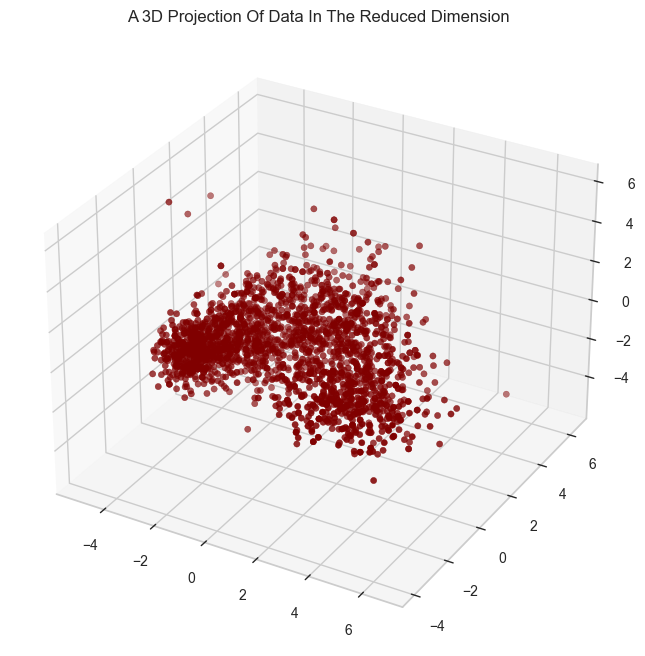

In [23]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#### CLustering
Using Agglomerative Clustering algorithm; this is nothing but a hierarchial clustering method. Involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


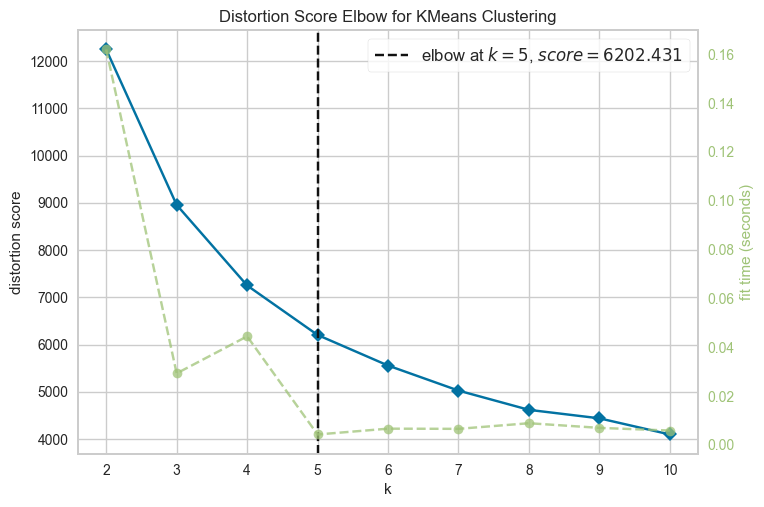

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

This indicates that 4 will be the optimum number of clusters required for this data.

In [25]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

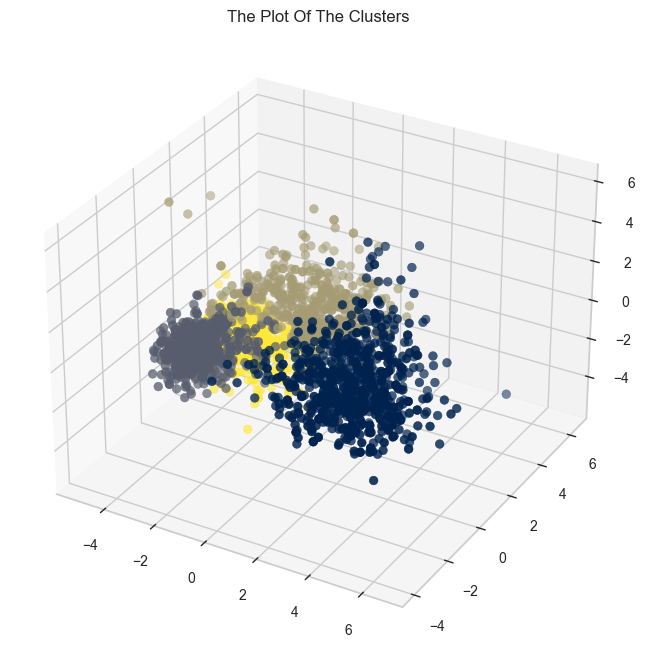

In [26]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='cividis')
ax.set_title("The Plot Of The Clusters")
plt.show()